In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

### **1. Data Exploration**

In [2]:
# Data Extraction

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Bootcamp Data Science Rakamin/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv'
df = pd.read_csv(path)
df.sample(2)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
93,gloomyClam6,100919,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Kurang,Jakarta Timur,Indeed,2,5.0,0.0,0.0,9.0,+6285908172xxx,gloomyClam6755@gmail.com,Doktor,1,NaN,jam_kerja,1988-09-14,2014-8-18,2020-1-30,2015-6-24
224,affectedLollies9,106673,Bercerai,Wanita,FullTime,Software Engineer (Back End),Mid_level,Biasa,Jakarta Pusat,Indeed,4,4.0,0.0,0.0,1.0,+6289519764xxx,affectedLollies9935@proton.com,Sarjana,1,NaN,NaN,1965-05-09,2011-07-05,2017-03-02,-


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [9]:
df['SkorKepuasanPegawai'].value_counts()

3.0    96
5.0    91
4.0    85
2.0     8
1.0     2
Name: SkorKepuasanPegawai, dtype: int64

In [10]:
df['JumlahKeikutsertaanProjek'].value_counts()

0.0    221
6.0     20
5.0     20
7.0      9
4.0      8
3.0      3
1.0      1
2.0      1
8.0      1
Name: JumlahKeikutsertaanProjek, dtype: int64

In [11]:
df['JumlahKeterlambatanSebulanTerakhir'].value_counts()

0.0    255
4.0      8
3.0      6
2.0      6
5.0      5
6.0      5
1.0      1
Name: JumlahKeterlambatanSebulanTerakhir, dtype: int64

In [12]:
df['JumlahKetidakhadiran'].value_counts()

4.0     20
2.0     20
15.0    19
7.0     17
16.0    17
6.0     16
14.0    16
3.0     16
19.0    15
13.0    15
17.0    14
1.0     14
20.0    13
9.0     12
11.0    12
10.0    10
8.0     10
5.0      9
12.0     7
18.0     7
50.0     1
55.0     1
Name: JumlahKetidakhadiran, dtype: int64

In [13]:
df['IkutProgramLOP'].value_counts()

1.0    15
0.0    14
Name: IkutProgramLOP, dtype: int64

In [14]:
df['AlasanResign'].value_counts()

masih_bekerja               132
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

SkorKepuasanPegawai akan diisi dengan 3

JumlahKeikutsertaanProject akan diisi dengan 0

JumlahKeterlambatanSebulanTerakhir akan diisi dengan 0

JumlahKetidakhadiran akan diisi dengan 0

IkutProgramLOP akan di drop karena data null >80%

AlasanResign akan diisi dengan masih_bekerja

In [15]:
df['SkorKepuasanPegawai'].fillna(3, inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(0, inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(0, inplace=True)
df['JumlahKetidakhadiran'].fillna(0, inplace=True)
df['AlasanResign'].fillna('masih_bekerja', inplace=True)

df.drop('IkutProgramLOP', axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [17]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [18]:
df.nunique()

Username                              285
EnterpriseID                          287
StatusPernikahan                        5
JenisKelamin                            2
StatusKepegawaian                       3
Pekerjaan                              14
JenjangKarir                            3
PerformancePegawai                      5
AsalDaerah                              5
HiringPlatform                          9
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   23
NomorHP                               287
Email                                 287
TingkatPendidikan                       3
PernahBekerja                           2
AlasanResign                           11
TanggalLahir                          284
TanggalHiring                          97
TanggalPenilaianKaryawan              127
TanggalResign                     

In [19]:
df['PernahBekerja'].value_counts()

1      286
yes      1
Name: PernahBekerja, dtype: int64

PernahBekerja akan di drop karena hanya memiliki 1 unique value

Username, EnterpriseID, Email, NomorHP akan di drop

In [20]:
df.drop('PernahBekerja', axis=1, inplace=True)
df.drop('Username', axis=1, inplace=True)
df.drop('EnterpriseID', axis=1, inplace=True)
df.drop('Email', axis=1, inplace=True)
df.drop('NomorHP', axis=1, inplace=True)

datatype dari kolom tanggal akan diubah menjadi datetime

In [21]:
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])

df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])

df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])

In [22]:
df['TanggalResign'].replace('-', np.nan, inplace=True)

df['TanggalResign'] = pd.to_datetime(df['TanggalResign'])

Asumsi tanggal sekarang adalah 2020-10-01

In [23]:
from datetime import datetime

def hitung_bulan(row):
    tanggal_sekarang = datetime(2020, 10, 1)
    if pd.notnull(row['TanggalResign']):
        if row['TanggalResign'] < row['TanggalHiring']:
            selisih = 0  # Atau tentukan logika khusus sesuai kebutuhan bisnis
        else:
            selisih = (row['TanggalResign'].year - row['TanggalHiring'].year) * 12 + row['TanggalResign'].month - row['TanggalHiring'].month
    else:
        selisih = (tanggal_sekarang.year - row['TanggalHiring'].year) * 12 + tanggal_sekarang.month - row['TanggalHiring'].month
    return selisih

df['LamaBekerja_Bulan'] = df.apply(hitung_bulan, axis=1)


In [24]:
df['LamaBekerja_Bulan'].describe()

count    287.000000
mean      79.170732
std       32.632122
min        0.000000
25%       65.500000
50%       81.000000
75%      104.500000
max      177.000000
Name: LamaBekerja_Bulan, dtype: float64

In [25]:
df['StatusPernikahan'].replace(['Lainnya', '-'], 'Belum_menikah', inplace=True)

In [26]:
df.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,LamaBekerja_Bulan
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,117
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,53
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,44
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,80
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,58


Isi nilai null pada TanggalResign dengan '-'

In [27]:
#df['TanggalResign'].fillna('-', inplace=True)

In [28]:
df.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,LamaBekerja_Bulan
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,117
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,53
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,44
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,80
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,58


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    287 non-null    object        
 1   JenisKelamin                        287 non-null    object        
 2   StatusKepegawaian                   287 non-null    object        
 3   Pekerjaan                           287 non-null    object        
 4   JenjangKarir                        287 non-null    object        
 5   PerformancePegawai                  287 non-null    object        
 6   AsalDaerah                          287 non-null    object        
 7   HiringPlatform                      287 non-null    object        
 8   SkorSurveyEngagement                287 non-null    int64         
 9   SkorKepuasanPegawai                 287 non-null    float64       
 10  JumlahKeikutsertaanProjek 

# Data Analysis

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 1: Buat dua tabel agregat
table_masuk = df.groupby(df['TanggalHiring'].dt.year).size().reset_index(name='Jumlah_Masuk').astype('Int64')
table_keluar = df.groupby(df['TanggalResign'].dt.year).size().reset_index(name='Jumlah_Keluar').astype('Int64')

table_masuk

,TanggalHiring,Jumlah_Masuk
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [31]:
table_keluar

,TanggalResign,Jumlah_Keluar
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


In [32]:
# Lakukan merge antara tabel masuk dan keluar berdasarkan kolom tahun
table_gabungan = pd.merge(table_masuk, table_keluar, left_on='TanggalHiring', right_on='TanggalResign', how='outer')
table_gabungan

,TanggalHiring,Jumlah_Masuk,TanggalResign,Jumlah_Keluar
0,2006,1,<NA>,<NA>
1,2007,2,<NA>,<NA>
2,2008,2,<NA>,<NA>
3,2009,7,<NA>,<NA>
4,2010,8,<NA>,<NA>
5,2011,76,<NA>,<NA>
6,2012,41,<NA>,<NA>
7,2013,43,2013,5
8,2014,56,2014,12
9,2015,31,2015,8


In [33]:
# Menggabungkan kolom 'TanggalHiring' dan 'TanggalResign' menjadi satu kolom 'Tahun'
table_gabungan['Tahun'] = table_gabungan['TanggalHiring'].combine_first(table_gabungan['TanggalResign'])

# Menghapus kolom 'TanggalHiring' dan 'TanggalResign' yang tidak diperlukan
table_gabungan = table_gabungan.drop(['TanggalHiring', 'TanggalResign'], axis=1)

table_gabungan['Jumlah_Masuk'].fillna(0, inplace=True)
table_gabungan['Jumlah_Keluar'].fillna(0, inplace=True)

# Cetak tabel gabungan setelah penggabungan
table_gabungan = table_gabungan[['Tahun','Jumlah_Masuk','Jumlah_Keluar']]
table_gabungan


,Tahun,Jumlah_Masuk,Jumlah_Keluar
0,2006,1,0
1,2007,2,0
2,2008,2,0
3,2009,7,0
4,2010,8,0
5,2011,76,0
6,2012,41,0
7,2013,43,5
8,2014,56,12
9,2015,31,8


In [34]:
# Menghitung total karyawan yang masih bertahan
table_gabungan['Perubahan'] = table_gabungan['Jumlah_Masuk'] - table_gabungan['Jumlah_Keluar']

# Hitung Jumlah Pegawai
table_gabungan['Jumlah_Pegawai'] = table_gabungan['Perubahan'].cumsum()

# Cetak tabel gabungan setelah perhitungan
table_gabungan


,Tahun,Jumlah_Masuk,Jumlah_Keluar,Perubahan,Jumlah_Pegawai
0,2006,1,0,1,1
1,2007,2,0,2,3
2,2008,2,0,2,5
3,2009,7,0,7,12
4,2010,8,0,8,20
5,2011,76,0,76,96
6,2012,41,0,41,137
7,2013,43,5,38,175
8,2014,56,12,44,219
9,2015,31,8,23,242


In [35]:
import plotly.graph_objects as go

# Membuat waterfall chart
fig = go.Figure(go.Waterfall(
    name='Jumlah Pegawai',
    orientation='v',
    x=table_gabungan['Tahun'],
    textposition = 'auto',
    text = table_gabungan['Jumlah_Pegawai'],
    y=table_gabungan['Perubahan'],
    connector = {'line':{'color':'brown'}},
    decreasing = {'marker':{'color':'red'}},
    increasing = {'marker':{'color':'orange'}},
))

# Menambahkan judul
fig.update_layout(
    title='Waterfall Chart Jumlah Pegawai',
    xaxis_title='Tahun',
    yaxis_title='Jumlah Pegawai',
    showlegend = True,
    margin=dict(t=80, b=20, l=50, r=50),
    hovermode='x unified',
    title_font=dict(size=25, color='#8a8d93', family='Lato, sans-serif'),
    font=dict(color='#8a8d93')
)

# Menampilkan chart
fig.show()

Pada Bagan di atas, dapat diketahui bahwa dari tahun 2006 hingga tahun 2016, selama 10 tahun ini jumlah karyawan terus menerus mengalami peningkatan. Dengan puncak jumlah karyawan sebanyak 248 orang. Namun mulai dari 2016 hingga 2020 ini, jumlah karyawan terus-menerus mengalami pengurangan. Hal ini tentu saja perlu dianalisa lebih lanjut agar tidak mengganggu workflow dan efisiensi kinerja perusahaan.

In [36]:
# Mengganti nilai pada kolom 'Resign' berdasarkan nilai 'AlasanResign'
df['Resign'] = df['AlasanResign'].apply(lambda x: 0 if x == 'masih_bekerja' else 1)

In [37]:
df['Resign'].value_counts()

0    198
1     89
Name: Resign, dtype: int64

In [38]:
df_resigned = df[df['Resign'] == 1].groupby('Pekerjaan')['Pekerjaan'].count().reset_index(name='Jml Employee')
df_not_resigned = df[df['Resign'] == 0].groupby('Pekerjaan')['Pekerjaan'].count().reset_index(name='Jml Employee')

df_resigned

,Pekerjaan,Jml Employee
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [39]:
df_not_resigned

,Pekerjaan,Jml Employee
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [40]:
merged_df = pd.merge(df_resigned, df_not_resigned, on='Pekerjaan', how='outer', suffixes=('_resigned', '_not_resigned'))
merged_df

,Pekerjaan,Jml Employee_resigned,Jml Employee_not_resigned
0,Data Analyst,8.0,8
1,Data Engineer,3.0,7
2,Product Design (UI & UX),9.0,15
3,Product Manager,6.0,11
4,Software Engineer (Android),7.0,17
5,Software Engineer (Back End),28.0,81
6,Software Engineer (Front End),28.0,44
7,DevOps Engineer,NaN,3
8,Digital Product Manager,NaN,2
9,Machine Learning Engineer,NaN,2


In [41]:
merged_df['Jml Employee_resigned'].fillna(0, inplace=True)

In [42]:
merged_df['Total Employee'] = merged_df['Jml Employee_resigned'] + merged_df['Jml Employee_not_resigned']
merged_df['%Jml Employee'] = (merged_df['Jml Employee_not_resigned'] / merged_df['Total Employee']) * 100
merged_df['%Attrition Rate'] = 100 - merged_df['%Jml Employee']

In [43]:
merged_df['Jml Employee_not_resigned'] = merged_df['Jml Employee_not_resigned'].astype('Int64')
merged_df['Jml Employee_resigned'] = merged_df['Jml Employee_resigned'].astype('Int64')
merged_df['Total Employee'] = merged_df['Total Employee'].astype('Int64')
merged_df['%Jml Employee'] = merged_df['%Jml Employee'].round(2)
merged_df['%Attrition Rate'] = merged_df['%Attrition Rate'].round(2)

In [44]:
merged_df

,Pekerjaan,Jml Employee_resigned,Jml Employee_not_resigned,Total Employee,%Jml Employee,%Attrition Rate
0,Data Analyst,8,8,16,50.00,50.00
1,Data Engineer,3,7,10,70.00,30.00
2,Product Design (UI & UX),9,15,24,62.50,37.50
3,Product Manager,6,11,17,64.71,35.29
4,Software Engineer (Android),7,17,24,70.83,29.17
5,Software Engineer (Back End),28,81,109,74.31,25.69
6,Software Engineer (Front End),28,44,72,61.11,38.89
7,DevOps Engineer,0,3,3,100.00,0.00
8,Digital Product Manager,0,2,2,100.00,0.00
9,Machine Learning Engineer,0,2,2,100.00,0.00


In [45]:
import plotly.express as px
# Membuat sunburst chart dengan skema warna kontinu
fig = px.sunburst(merged_df, path=['Pekerjaan', '%Attrition Rate'],
                  values='%Jml Employee', title='Employee Attrition Analysis',
                  color='%Attrition Rate', hover_data=['Pekerjaan'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(merged_df['%Attrition Rate'], weights=merged_df['%Attrition Rate']))
fig.update_layout(width=600, height=500, title_x=0.5, title_y=0.9, legend_title="Legend Title", legend_x=0, legend_y=1)

# Menampilkan sunburst chart
fig.show()


In [46]:
highest_rate_resign_division = merged_df.loc[merged_df['%Attrition Rate'].idxmax(), 'Pekerjaan']
resign_aggregate_table = df[df['Pekerjaan'] == highest_rate_resign_division].groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign'])['Pekerjaan'].count().reset_index(name='Jml Employee Resign')


In [47]:
highest_rate_resign_division

'Data Analyst'

In [48]:
resign_aggregate_table = resign_aggregate_table[resign_aggregate_table['AlasanResign'] != 'masih_bekerja']
resign_aggregate_table

,JenjangKarir,PerformancePegawai,AlasanResign,Jml Employee Resign
1,Freshgraduate_program,Bagus,toxic_culture,1
2,Freshgraduate_program,Biasa,internal_conflict,1
4,Freshgraduate_program,Biasa,toxic_culture,1
5,Freshgraduate_program,Sangat_bagus,internal_conflict,1
6,Freshgraduate_program,Sangat_bagus,toxic_culture,3
7,Freshgraduate_program,Sangat_kurang,toxic_culture,1


In [49]:
import plotly.express as px

fig = px.sunburst(resign_aggregate_table, path=['JenjangKarir','AlasanResign', 'PerformancePegawai','Jml Employee Resign'], values='Jml Employee Resign',
                  title='Sunburst Chart Resign Reasons',
                  color='Jml Employee Resign', hover_data=['AlasanResign'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(resign_aggregate_table['Jml Employee Resign'], weights=resign_aggregate_table['Jml Employee Resign']))

fig.update_layout(width=700, height=600, title_x=0.5, title_y=0.9, legend_title="Legend Title", legend_x=0, legend_y=1)

fig.show()


Dari analisis grafik sebelumnya, terlihat bahwa tingkat pengunduran diri tertinggi terjadi di bidang Data Analyst. Semua karyawan yang resign berasal dari kategori FreshGraduate Program dengan alasan utama terkait dengan lingkungan kerja yang beracun (toxic_culture) dan konflik internal. Menariknya, sebagian besar dari karyawan yang resign memiliki performa sangat baik, menunjukkan adanya potensi pengurangan efisiensi. Perusahaan perlu menangani masalah budaya kerja yang beracun untuk mempertahankan karyawan berpotensi dan menjaga kelancaran operasional.

In [50]:
nums_analysis = df.select_dtypes(exclude=['object'])

In [51]:
plt.figure(figsize=(25,10))
for i, column in enumerate(nums.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=nums, x=column, color='orange')
    plt.title(f"Boxplot of {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

NameError: ignored

<Figure size 2500x1000 with 0 Axes>

## Handling Outliers

<Axes: xlabel='JumlahKetidakhadiran', ylabel='Density'>

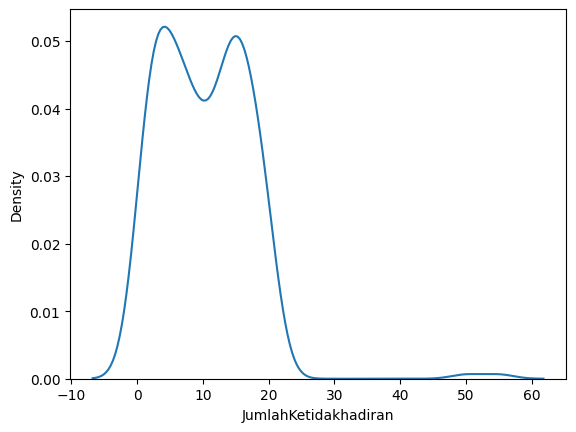

In [52]:
sns.kdeplot(df['JumlahKetidakhadiran'])

<Axes: xlabel='JumlahKetidakhadiran', ylabel='Density'>

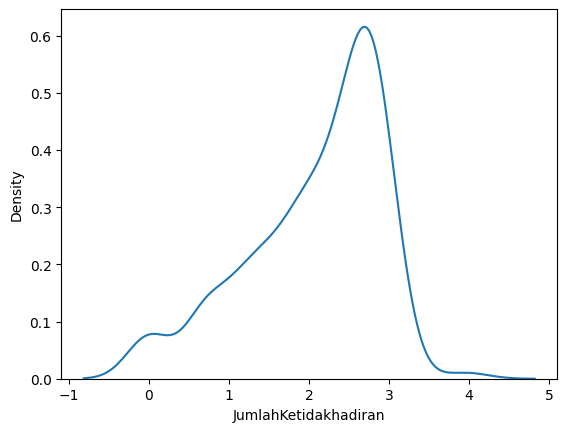

In [53]:
sns.kdeplot(np.log(df['JumlahKetidakhadiran']))

In [54]:
#df['log_JumlahKetidakhadiran'] = np.log(df['JumlahKetidakhadiran'])
#df['log_JumlahKetidakhadiran'] = df['log_JumlahKetidakhadiran'].round(2)
#df = df.drop(columns='JumlahKetidakhadiran')


In [55]:
#df['log_JumlahKetidakhadiran']

# Modeling

Resign 0 = No,
1 = Yes

In [56]:
df_ml = df.copy()

In [57]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    287 non-null    object        
 1   JenisKelamin                        287 non-null    object        
 2   StatusKepegawaian                   287 non-null    object        
 3   Pekerjaan                           287 non-null    object        
 4   JenjangKarir                        287 non-null    object        
 5   PerformancePegawai                  287 non-null    object        
 6   AsalDaerah                          287 non-null    object        
 7   HiringPlatform                      287 non-null    object        
 8   SkorSurveyEngagement                287 non-null    int64         
 9   SkorKepuasanPegawai                 287 non-null    float64       
 10  JumlahKeikutsertaanProjek 

In [58]:
df_ml[['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']] = df_ml[['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']].astype('int64')


In [59]:
current_date = datetime.strptime('2020-10-01', '%Y-%m-%d')

df_ml['TanggalLahir'] = pd.to_datetime(df_ml['TanggalLahir'])

df_ml['Umur'] = current_date.year - df_ml['TanggalLahir'].dt.year - ((current_date.month < df_ml['TanggalLahir'].dt.month) | ((current_date.month == df_ml['TanggalLahir'].dt.month) & (current_date.day < df_ml['TanggalLahir'].dt.day)))


In [60]:
df_ml.drop('TanggalResign', axis=1, inplace=True)

In [61]:
df_ml.drop('TanggalPenilaianKaryawan', axis=1, inplace=True)

In [62]:
df_ml.drop('TanggalLahir', axis=1, inplace=True)

In [63]:
df_ml.drop('TanggalHiring', axis=1, inplace=True)

In [64]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   StatusPernikahan                    287 non-null    object
 1   JenisKelamin                        287 non-null    object
 2   StatusKepegawaian                   287 non-null    object
 3   Pekerjaan                           287 non-null    object
 4   JenjangKarir                        287 non-null    object
 5   PerformancePegawai                  287 non-null    object
 6   AsalDaerah                          287 non-null    object
 7   HiringPlatform                      287 non-null    object
 8   SkorSurveyEngagement                287 non-null    int64 
 9   SkorKepuasanPegawai                 287 non-null    int64 
 10  JumlahKeikutsertaanProjek           287 non-null    int64 
 11  JumlahKeterlambatanSebulanTerakhir  287 non-null    int64 

In [65]:
nums = df_ml.select_dtypes(exclude=['object'])
cats = df_ml.select_dtypes(include=['object'])

In [66]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   StatusPernikahan    287 non-null    object
 1   JenisKelamin        287 non-null    object
 2   StatusKepegawaian   287 non-null    object
 3   Pekerjaan           287 non-null    object
 4   JenjangKarir        287 non-null    object
 5   PerformancePegawai  287 non-null    object
 6   AsalDaerah          287 non-null    object
 7   HiringPlatform      287 non-null    object
 8   TingkatPendidikan   287 non-null    object
 9   AlasanResign        287 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [67]:
cats['TingkatPendidikan'].value_counts()

Sarjana     176
Magister     87
Doktor       24
Name: TingkatPendidikan, dtype: int64

In [68]:
cats['JenjangKarir'].value_counts()

Freshgraduate_program    169
Mid_level                 70
Senior_level              48
Name: JenjangKarir, dtype: int64

In [69]:
cats['JenisKelamin'].value_counts()

Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64

In [70]:
cats['PerformancePegawai'].value_counts()

Biasa            85
Bagus            74
Sangat_bagus     73
Kurang           31
Sangat_kurang    24
Name: PerformancePegawai, dtype: int64

label encoding = JenisKelamin, JenjangKarir, TingkatPendidikan, PerformancePegawai

one-hot encoding = Status Pernikahan, StatusKepegawaian, Pekerjaan, AsalDaerah, HiringPlatform, AlasanResign

In [71]:
# One-Hot Encoding
df_ml = pd.get_dummies(df_ml, columns=['StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform', 'AlasanResign'])


In [72]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_ml['JenisKelamin'] = label_encoder.fit_transform(df_ml['JenisKelamin'])
df_ml['JenjangKarir'] = label_encoder.fit_transform(df_ml['JenjangKarir'])

perf_sort = {'Sangat_kurang': 0, 'Kurang': 1, 'Biasa': 2, 'Bagus': 3, 'Sangat_bagus': 4}
df_ml['PerformancePegawai'] = df_ml['PerformancePegawai'].replace(perf_sort)

pend_sort = {'Sarjana': 0, 'Magister': 1, 'Doktor': 2}
df_ml['TingkatPendidikan'] = df_ml['TingkatPendidikan'].replace(pend_sort)



In [73]:
df_ml['JenisKelamin'].value_counts()

1    167
0    120
Name: JenisKelamin, dtype: int64

In [74]:
df_ml['JenjangKarir'].value_counts()

0    169
1     70
2     48
Name: JenjangKarir, dtype: int64

In [75]:
df_ml['TingkatPendidikan'].value_counts()

0    176
1     87
2     24
Name: TingkatPendidikan, dtype: int64

In [76]:
df_ml['PerformancePegawai'].value_counts()

2    85
3    74
4    73
1    31
0    24
Name: PerformancePegawai, dtype: int64

In [77]:
df_ml.head()

,JenisKelamin,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,LamaBekerja_Bulan,Resign,Umur,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AsalDaerah_Jakarta Barat,AsalDaerah_Jakarta Pusat,AsalDaerah_Jakarta Selatan,AsalDaerah_Jakarta Timur,AsalDaerah_Jakarta Utara,HiringPlatform_CareerBuilder,HiringPlatform_Diversity_Job_Fair,HiringPlatform_Employee_Referral,HiringPlatform_Google_Search,HiringPlatform_Indeed,HiringPlatform_LinkedIn,HiringPlatform_On-line_Web_application,HiringPlatform_Other,HiringPlatform_Website,AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_masih_bekerja,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture
0,0,0,4,4,4,0,0,9,1,117,0,48,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,4,4,4,0,3,0,53,1,36,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,3,4,3,0,0,11,1,44,1,46,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,3,3,3,0,4,6,0,80,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,3,3,3,0,0,11,0,58,1,45,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Train Test Split

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [79]:
df_test = df_ml.copy()

In [80]:
X = df_test.drop(['Resign'],axis=1,inplace=False)
y = df_test['Resign']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=101, stratify = y)

In [81]:
ytest.info()

<class 'pandas.core.series.Series'>
Int64Index: 87 entries, 203 to 29
Series name: Resign
Non-Null Count  Dtype
--------------  -----
87 non-null     int64
dtypes: int64(1)
memory usage: 1.4 KB


In [82]:
ytrain.info()

<class 'pandas.core.series.Series'>
Int64Index: 200 entries, 218 to 200
Series name: Resign
Non-Null Count  Dtype
--------------  -----
200 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB


In [83]:
Xtrain.head()

,JenisKelamin,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,LamaBekerja_Bulan,Umur,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AsalDaerah_Jakarta Barat,AsalDaerah_Jakarta Pusat,AsalDaerah_Jakarta Selatan,AsalDaerah_Jakarta Timur,AsalDaerah_Jakarta Utara,HiringPlatform_CareerBuilder,HiringPlatform_Diversity_Job_Fair,HiringPlatform_Employee_Referral,HiringPlatform_Google_Search,HiringPlatform_Indeed,HiringPlatform_LinkedIn,HiringPlatform_On-line_Web_application,HiringPlatform_Other,HiringPlatform_Website,AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_masih_bekerja,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture
218,0,1,0,3,5,0,0,8,1,71,46,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
110,1,0,0,3,4,6,0,16,0,69,32,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
131,1,0,1,4,5,0,0,9,0,81,56,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
70,1,1,1,3,3,6,0,2,1,95,34,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
264,0,0,4,3,4,5,0,13,0,52,37,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [84]:
nums2 = nums.drop(['Resign'],axis=1,inplace=False)

In [85]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for col in nums2:
  scaler = ss.fit(Xtrain[[col]])

  Xtrain[[col]] = ss.transform(Xtrain[[col]])
  Xtest[[col]] = ss.transform(Xtest[[col]])

## Handling Imbalance

In [86]:
ytrain.value_counts()

0    138
1     62
Name: Resign, dtype: int64

In [87]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=4022)
Xtrain_over, ytrain_over = smote.fit_resample(Xtrain, ytrain)

print('SMOTE')
print(pd.Series(ytrain_over).value_counts())

SMOTE
0    138
1    138
Name: Resign, dtype: int64


## Modeling

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

RFclassifier = RandomForestClassifier()
RFclassifier.fit(Xtrain_over, ytrain_over)
y_pred_rf = RFclassifier.predict(Xtrain_over)
y_pred_rf_test = RFclassifier.predict(Xtest)

LRclassifier = LogisticRegression()
LRclassifier.fit(Xtrain_over, ytrain_over)
y_pred_lr = LRclassifier.predict(Xtrain_over)
y_pred_lr_test = LRclassifier.predict(Xtest)

XTclassifier = ExtraTreesClassifier()
XTclassifier.fit(Xtrain_over, ytrain_over)
y_pred_xt = XTclassifier.predict(Xtrain_over)
y_pred_xt_test = XTclassifier.predict(Xtest)

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(Xtrain_over, ytrain_over)
y_pred_dt = DTclassifier.predict(Xtrain_over)
y_pred_dt_test = DTclassifier.predict(Xtest)

GBclassifier = GradientBoostingClassifier()
GBclassifier.fit(Xtrain_over, ytrain_over)
y_pred_gb = GBclassifier.predict(Xtrain_over)
y_pred_gb_test = GBclassifier.predict(Xtest)

XGBclassifier = XGBClassifier()
XGBclassifier.fit(Xtrain_over, ytrain_over)
y_pred_xgb = XGBclassifier.predict(Xtrain_over)
y_pred_xgb_test = XGBclassifier.predict(Xtest)

In [89]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def evaluate_model(model, Xtrain_over, ytrain_over, Xtest, ytest, algorithm_name):
    model.fit(Xtrain_over, ytrain_over)
    y_pred_train = model.predict(Xtrain_over)
    y_pred_test = model.predict(Xtest)

    train_accuracy = accuracy_score(ytrain_over, y_pred_train)
    test_accuracy = accuracy_score(ytest, y_pred_test)

    train_f1 = f1_score(ytrain_over, y_pred_train)
    test_f1 = f1_score(ytest, y_pred_test)

    train_auc = roc_auc_score(ytrain_over, y_pred_train)
    test_auc = roc_auc_score(ytest, y_pred_test)

    return [algorithm_name, train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc]

In [90]:
# Evaluasi model menggunakan fungsi
results = []
models = [RFclassifier, LRclassifier, XTclassifier, DTclassifier, GBclassifier, XGBclassifier]
names = ['RandomForest', 'LogisticRegression', 'Extratrees', 'DecisionTree', 'GradientBoost', 'XGBoost']

for model, name in zip(models, names):
    result = evaluate_model(model, Xtrain_over, ytrain_over, Xtest, ytest, name)
    results.append(result)

# Konversi hasil ke DataFrame
result_df = pd.DataFrame(results, columns=['Model', 'Akurasi Train', 'Akurasi Test', 'F1 Score Train', 'F1 Score Test', 'AUC Train', 'AUC Test'])
result_df


,Model,Akurasi Train,Akurasi Test,F1 Score Train,F1 Score Test,AUC Train,AUC Test
0,RandomForest,1.0,1.0,1.0,1.0,1.0,1.0
1,LogisticRegression,1.0,1.0,1.0,1.0,1.0,1.0
2,Extratrees,1.0,1.0,1.0,1.0,1.0,1.0
3,DecisionTree,1.0,1.0,1.0,1.0,1.0,1.0
4,GradientBoost,1.0,1.0,1.0,1.0,1.0,1.0
5,XGBoost,1.0,1.0,1.0,1.0,1.0,1.0


In [91]:
def evaluation_tuned(model, Xtrain_over, ytrain_over, Xtest, ytest):
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain_over)
    y_pred_proba = model.predict_proba(Xtest)
    y_pred_proba_train = model.predict_proba(Xtrain_over)

    print('**EVALUATION **\nAUC Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(ytrain_over, y_pred_proba_train[:,1]), 6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(ytest, y_pred_proba[:,1]), 6)}\n')

    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(ytest, y_pred), 4)}')
    print(f'Precision Score Test: {round(precision_score(ytest, y_pred), 4)}')
    print(f'Recall Score Test : {round(recall_score(ytest, y_pred), 4)}')
    print(f'F1 Score Test : {round(f1_score(ytest, y_pred), 4)}\n')

    print('**CONFUSION MATRIX**')
    print(confusion_matrix(ytest, y_pred))


In [92]:
from sklearn.model_selection import GridSearchCV
rforest = RandomForestClassifier()
rforest_hyparameters = {"n_estimators": [20],
                        "criterion": ['entropy'],
                        "max_depth": [10],
                        "min_samples_split": [5],
                        "min_samples_leaf": [20],
                        "max_features": ['auto']}

tuned_rforest = GridSearchCV(rforest, rforest_hyparameters, cv=5, n_jobs=-1, scoring='recall')
tuned_rforest.fit(Xtrain_over, ytrain_over)
print(f'Best Parameter: {tuned_rforest.best_params_}')


Best Parameter: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 5, 'n_estimators': 20}


In [93]:
evaluation_tuned(tuned_rforest, Xtrain_over, ytrain_over, Xtest, ytest)

**EVALUATION **
AUC Train vs Test:
AUC Score Train proba: 0.999947
AUC Score Test proba: 0.999383

Others Metrics Evaluation:
Test Accuracy Score : 0.9885
Precision Score Test: 1.0
Recall Score Test : 0.963
F1 Score Test : 0.9811

**CONFUSION MATRIX**
[[60  0]
 [ 1 26]]


In [105]:
dtree = DecisionTreeClassifier()
dtree_hyparameters = {"criterion":['gini','entropy'],
                      "max_depth":[5,14,24],
                      "min_samples_split":[2,10,100],
                      "min_samples_leaf":[2,10,100],
                      "max_features":['auto','sqrt']}

tuned_dtree = GridSearchCV(dtree, dtree_hyparameters, cv=5, n_jobs=-1, scoring='recall')
tuned_dtree.fit(Xtrain_over, ytrain_over)
print(f'Best Parameter: {tuned_dtree.best_params_}')

Best Parameter: {'criterion': 'gini', 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [106]:
evaluation_tuned(tuned_dtree, Xtrain_over, ytrain_over, Xtest, ytest)

**EVALUATION **
AUC Train vs Test:
AUC Score Train proba: 0.995274
AUC Score Test proba: 0.967593

Others Metrics Evaluation:
Test Accuracy Score : 0.954
Precision Score Test: 0.96
Recall Score Test : 0.8889
F1 Score Test : 0.9231

**CONFUSION MATRIX**
[[59  1]
 [ 3 24]]


Decisison tree Score Before Hyperparameter Tuning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       138

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276

Decisision tree Score After Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.93      0.99      0.95       138
           1       0.98      0.92      0.95       138

    accuracy                           0.95       276
   macro avg       0.95      0.95      0.95       276
weighted avg       0.95      0.95      0.95       276



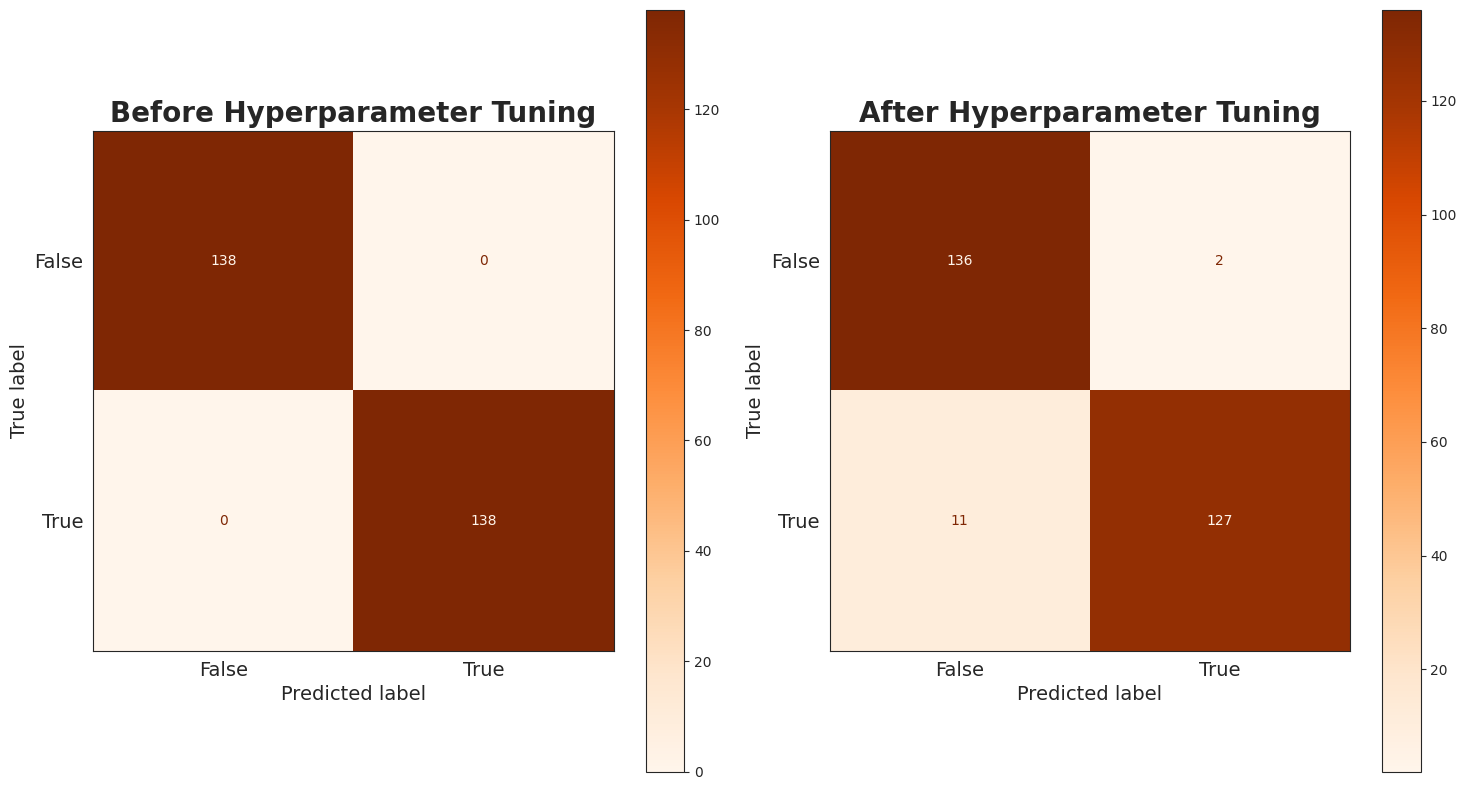

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
plt.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.set_style("white")

# adjust font size of axis labels
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)

# adjust font size of x and y axis labels
ax[0].set_xlabel("Predicted Labels", fontsize=14)
ax[0].set_ylabel("True Labels", fontsize=14)
ax[1].set_xlabel("Predicted Labels", fontsize=14)
ax[1].set_ylabel("True Labels", fontsize=14)

ax[0].set_title("Before Hyperparameter Tuning", fontsize=20, weight='bold')
ax[1].set_title("After Hyperparameter Tuning", fontsize=20, weight='bold')

# Set threshold value
threshold = 0.6

# Get predicted probabilities
y_pred_probs_before_tuning = DTclassifier.predict_proba(Xtrain_over)[:, 1]
y_pred_probs_after_tuning = tuned_dtree.predict_proba(Xtrain_over)[:, 1]

# Apply threshold to get binary labels
y_pred_before_tuning = (y_pred_probs_before_tuning > threshold).astype(int)
y_pred_after_tuning = (y_pred_probs_after_tuning > threshold).astype(int)

print("Decisison tree Score Before Hyperparameter Tuning")
print(metrics.classification_report(ytrain_over, y_pred_before_tuning))
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(ytrain_over, y_pred_before_tuning),
    display_labels=[False, True]).plot(ax=ax[0], cmap='Oranges')

print("Decisision tree Score After Hyperparameter Tuning")
print(metrics.classification_report(ytrain_over, y_pred_after_tuning))
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(ytrain_over, y_pred_after_tuning),
    display_labels=[False, True]).plot(ax=ax[1], cmap='Oranges')
plt.tight_layout()
plt.show()

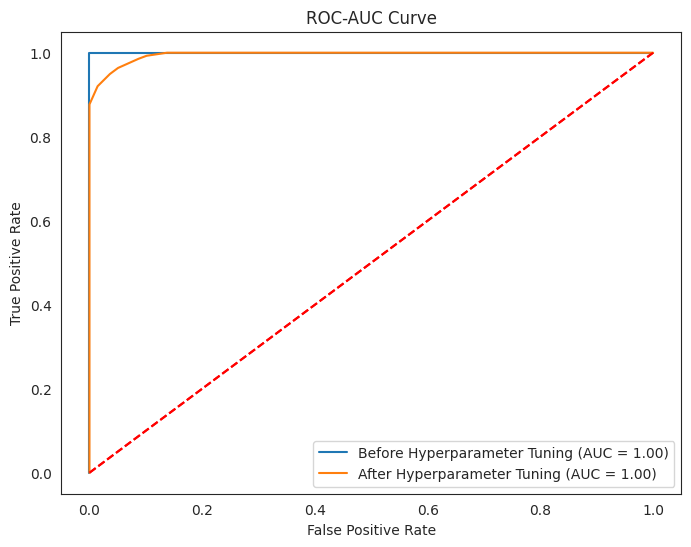

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_auc(model, X, y, ax, label):
    y_pred_probs = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_probs)
    auc_score = roc_auc_score(y, y_pred_probs)
    ax.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')
    ax.plot([0, 1], [0, 1], 'r--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC-AUC Curve')
    ax.legend(loc='lower right')

# Create a new figure and axes for the ROC-AUC plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC-AUC for the model before tuning
plot_roc_auc(DTclassifier, Xtrain_over, ytrain_over, ax, label='Before Hyperparameter Tuning')

# Plot ROC-AUC for the model after tuning
plot_roc_auc(tuned_dtree, Xtrain_over, ytrain_over, ax, label='After Hyperparameter Tuning')

# Show the plot
plt.show()


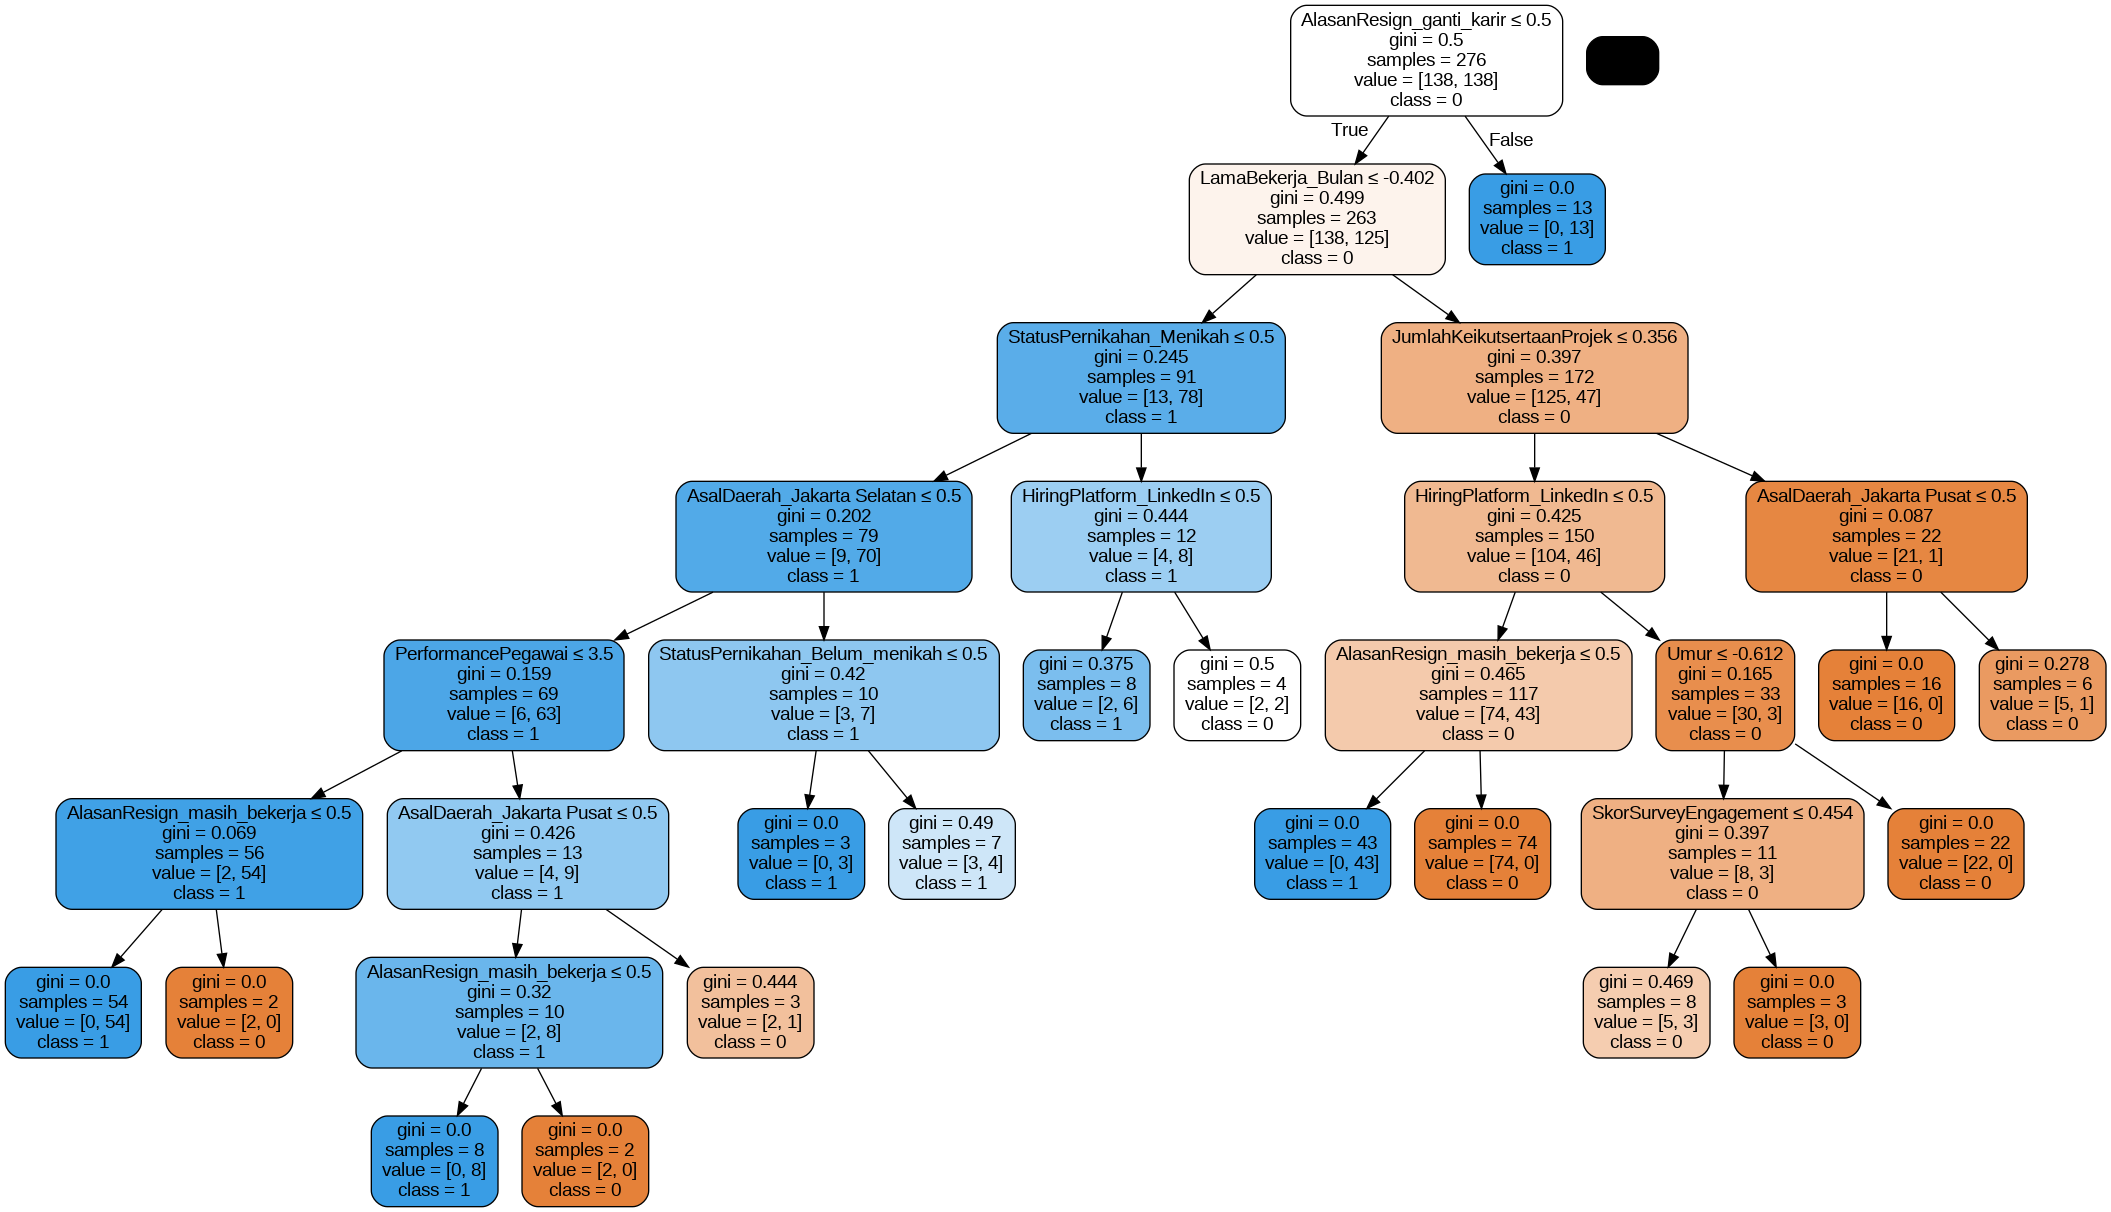

In [114]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

# Membuat diagram decision tree
dot_data = StringIO()
export_graphviz(tuned_dtree.best_estimator_, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = Xtrain_over.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())


In [116]:
from sklearn.tree import export_text

tree_rules = export_text(tuned_dtree.best_estimator_, feature_names=list(Xtrain_over.columns))
print(tree_rules)


|--- AlasanResign_ganti_karir <= 0.50
|   |--- LamaBekerja_Bulan <= -0.40
|   |   |--- StatusPernikahan_Menikah <= 0.50
|   |   |   |--- AsalDaerah_Jakarta Selatan <= 0.50
|   |   |   |   |--- PerformancePegawai <= 3.50
|   |   |   |   |   |--- AlasanResign_masih_bekerja <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- AlasanResign_masih_bekerja >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- PerformancePegawai >  3.50
|   |   |   |   |   |--- AsalDaerah_Jakarta Pusat <= 0.50
|   |   |   |   |   |   |--- AlasanResign_masih_bekerja <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- AlasanResign_masih_bekerja >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- AsalDaerah_Jakarta Pusat >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- AsalDaerah_Jakarta Selatan >  0.50
|   |   |   |   |--- StatusPernikahan_Belum_menikah <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Sta